6.549797e-08
8.946008e-08


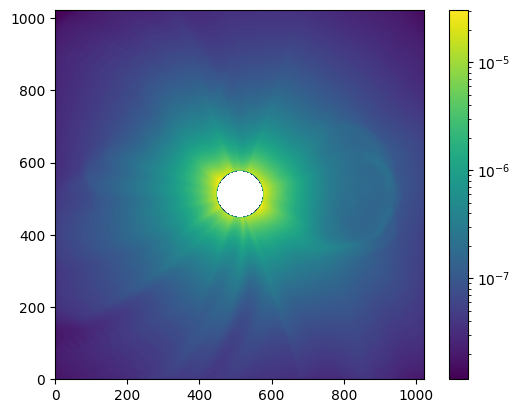

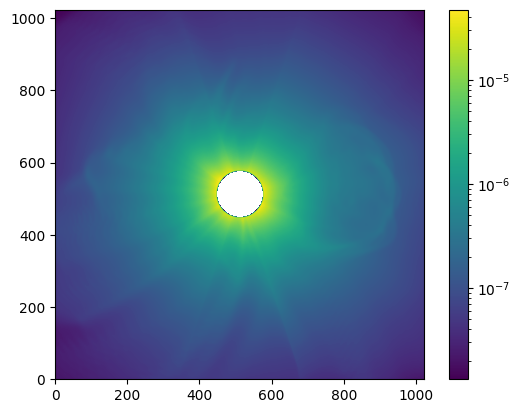

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm


fits_file_pB = fits.open('CME_0_pB\stepnum_078.fits')
fits_file_tB = fits.open('CME_0_tB\stepnum_078.fits')
fits_file_pB2 = fits.open('CME_0_pB\stepnum_020.fits')
fits_file_tB2 = fits.open('CME_0_tB\stepnum_020.fits')

image_data_pB = fits_file_pB[0].data
image_data_tB = fits_file_tB[0].data
image_data_pB2 = fits_file_pB2[0].data
image_data_tB2 = fits_file_tB2[0].data

# print(image_data_pB)
# print(image_data_tB)
print(image_data_pB[900][600])
print(image_data_tB[900][600])

plt.figure()
plt.imshow(image_data_pB, origin='lower', norm=LogNorm())
plt.colorbar()
# plt.show()
plt.figure()
plt.imshow(image_data_tB, origin='lower', norm=LogNorm())
plt.colorbar()

In [53]:
def calculate_median_pixel_values(image_data):
    # Get the dimensions of the image
    height, width = image_data.shape

    # Calculate the center coordinates
    center_x = width // 2
    center_y = height // 2

    # Calculate the maximum radius
    max_radius = int(np.sqrt(center_x**2 + center_y **2)) +1 

    # Initialize an empty list to store the median pixel values
    median_values = []

    # Iterate over the different bands of radius
    for radius in range(5, max_radius + 1, 5):
        
        # Calculate the indices of the pixels within the current band of radius
        greater = np.sqrt((np.arange(height)[:, np.newaxis] - center_y) ** 2 +
                          (np.arange(width) - center_x) ** 2) <= radius
        # plt.figure()
        # plt.imshow(greater)
        less = np.sqrt((np.arange(height)[:, np.newaxis] - center_y) ** 2 +
                       (np.arange(width) - center_x) ** 2) > radius - 5
        
        sides = (np.arctan(np.abs(np.arange(height)[:, np.newaxis] - center_y)/
                           np.abs(np.arange(width) - center_x))) < (90-22.5)*np.pi/180
        # print(sides)

        greaterLess = np.logical_and(greater, less)
        both = np.logical_and(greaterLess, sides)  

        if(radius%500 == 0):
            plt.figure()
            plt.imshow(both)
        
        # print(greater)
        # print(less)

        indices = np.where(both)
        # print(indices)

        # Extract the pixel values within the current band of radius
        pixels = image_data[indices]

        # Calculate the median pixel value
        median_value = np.quantile(pixels,0.85)

        # Append the median value to the list
        median_values.append(median_value)

    return median_values


In [46]:
def subtractRadialMedian(image_data, median_values):
    height, width = image_data.shape
    imageSubtract = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            radius = np.sqrt((i - height//2)**2 + (j - width//2)**2)
            lower = int(radius//5)
            upper = lower + 1
            if upper < len(median_values):
                lower_median = median_values[lower]
                upper_median = median_values[upper]
                weight = (radius/5) - lower
                imageSubtract[i][j] = (1-weight)*lower_median + weight*upper_median
            else:
                imageSubtract[i][j] = median_values[-1]
    plt.figure()
    plt.imshow(image_data - imageSubtract, origin='lower', norm=LogNorm())

    return image_data - imageSubtract

In [43]:
def calculateExitAngles(image_data_pB, image_data_tB, xConstraints, yConstraints ):
    xMin, xMax = xConstraints
    yMin, yMax = yConstraints
    angleMatrixPositive = np.zeros((len(image_data_pB),len(image_data_pB[0]) ))
    angleMatrixNegative = np.zeros((len(image_data_pB),len(image_data_pB[0]) ))

    # angleMatrixPositive = [[0] * len(image_data_pB[0])  for i in range(len(image_data_pB))]
    # angleMatrixNegative = [[0] * len(image_data_pB[0])  for i in range(len(image_data_pB))]

    Y = len(image_data_pB)
    halfY = Y/2.0
    X = len(image_data_pB[0])
    halfX = X/2.0
    # print(angleMatrixPositive[0][0])
    for i in range(yMin,yMax):
        for j in range(xMin,xMax):
            y = np.abs(halfY - i)
            y = y*45/halfY

            x = np.abs(halfX- j)
            x = x*45/halfX
            
            epsilon = np.sqrt(x*x + y*y)
            # print(epsilon)
            if(image_data_tB[i][j] != 0):
                pBratio = image_data_pB[i][j]/image_data_tB[i][j]
                angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.arcsin(np.sqrt((1 - pBratio)/(1 + pBratio))))
                angleMatrixNegative[i][j] = epsilon + np.rad2deg(np.arcsin(-np.sqrt((1 - pBratio)/(1 + pBratio))))

    print("positive: ", angleMatrixPositive[500][750])
    print("negative: ", angleMatrixNegative[500][750])
    return angleMatrixPositive, angleMatrixNegative

C:\Users\glenn\AppData\Local\Temp\ipykernel_41624\1444570954.py:26: RuntimeWarning: divide by zero encountered in divide
  sides = (np.arctan(np.abs(np.arange(height)[:, np.newaxis] - center_y)/
C:\Users\glenn\AppData\Local\Temp\ipykernel_41624\1444570954.py:26: RuntimeWarning: invalid value encountered in divide
  sides = (np.arctan(np.abs(np.arange(height)[:, np.newaxis] - center_y)/


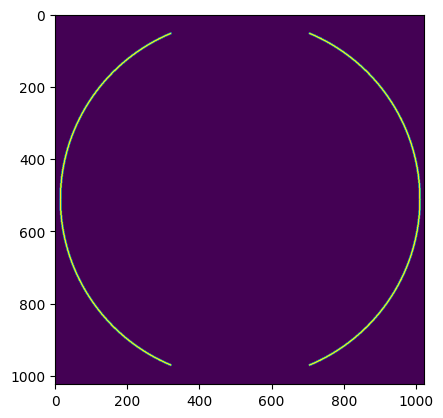

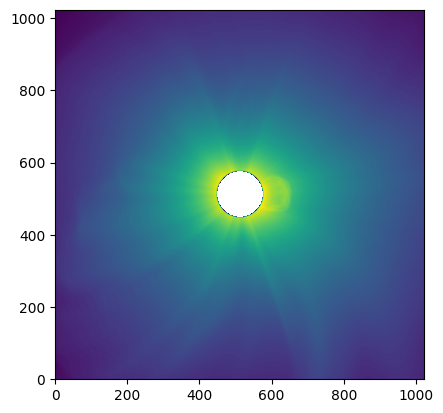

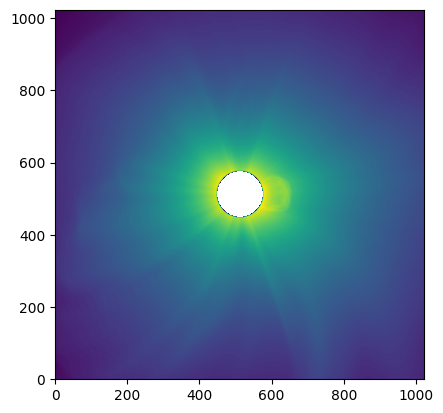

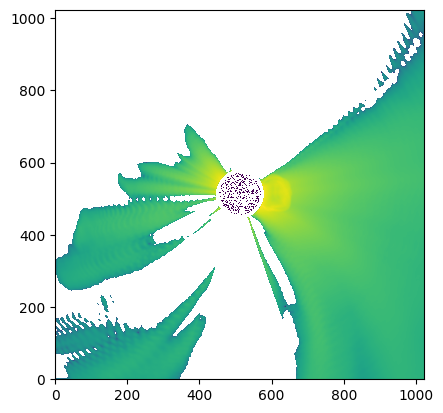

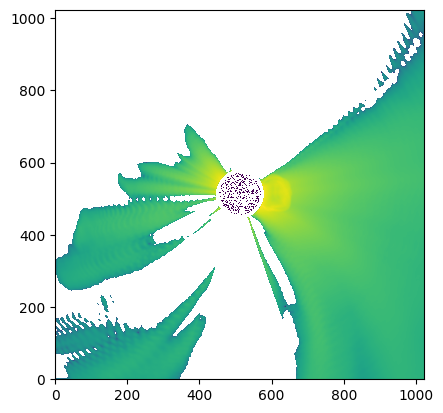

In [49]:


# matrix = np.ones((1024, 1024))
# print(matrix)
median_values = calculate_median_pixel_values(image_data_pB2)
plt.figure()
plt.imshow(image_data_pB2, origin='lower', norm=LogNorm())
plt.figure()
plt.imshow(image_data_pB2, origin='lower', norm=LogNorm())
image_data_pB_subtract = subtractRadialMedian(image_data_pB2, median_values)
plt.figure()
plt.imshow(image_data_pB_subtract, origin='lower', norm = LogNorm())




C:\Users\glenn\AppData\Local\Temp\ipykernel_41624\3133615967.py:26: RuntimeWarning: divide by zero encountered in divide
  sides = (np.arctan(np.abs(np.arange(height)[:, np.newaxis] - center_y)/
C:\Users\glenn\AppData\Local\Temp\ipykernel_41624\3133615967.py:26: RuntimeWarning: invalid value encountered in divide
  sides = (np.arctan(np.abs(np.arange(height)[:, np.newaxis] - center_y)/
C:\Users\glenn\AppData\Local\Temp\ipykernel_41624\2960439160.py:27: RuntimeWarning: invalid value encountered in sqrt
  angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.arcsin(np.sqrt((1 - pBratio)/(1 + pBratio))))
C:\Users\glenn\AppData\Local\Temp\ipykernel_41624\2960439160.py:28: RuntimeWarning: invalid value encountered in sqrt
  angleMatrixNegative[i][j] = epsilon + np.rad2deg(np.arcsin(-np.sqrt((1 - pBratio)/(1 + pBratio))))
C:\Users\glenn\AppData\Local\Temp\ipykernel_41624\2960439160.py:27: RuntimeWarning: invalid value encountered in arcsin
  angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.

positive:  56.66592174756861
negative:  -14.776840480554277
positive:  49.70218285824773
negative:  -7.813101591233398


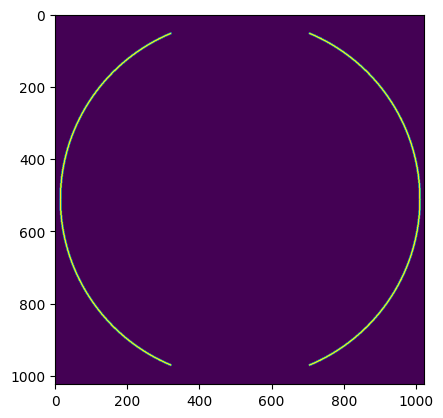

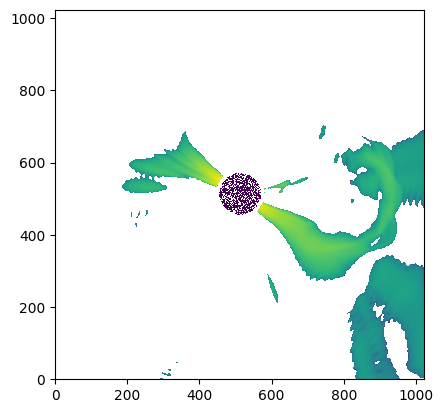

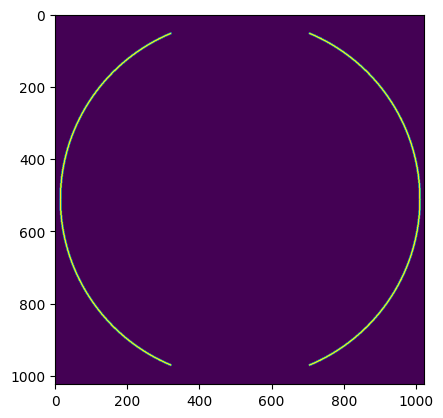

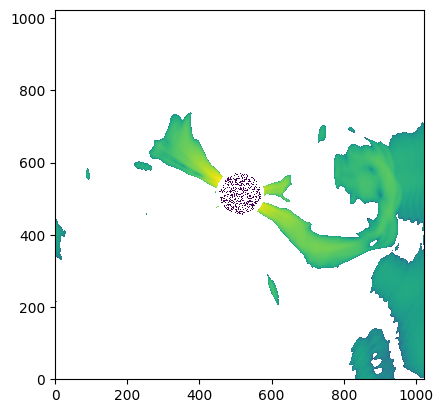

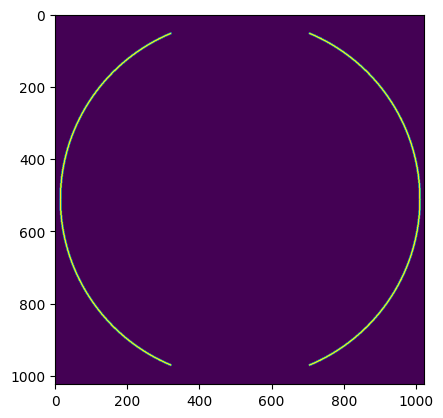

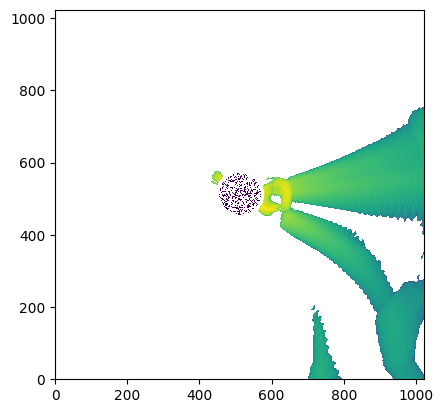

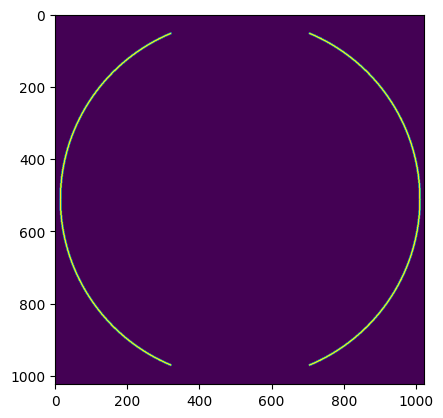

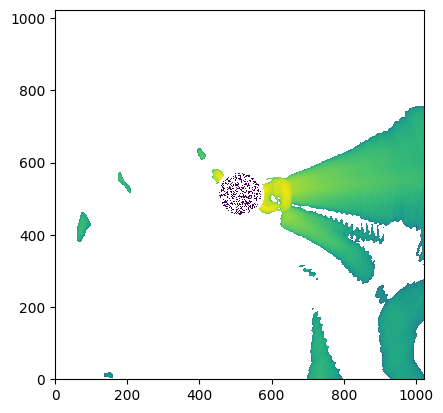

In [54]:
xMin = 0
xMax = 1024

yMin = 0
yMax = 1024

image_data_pB_subtracted = subtractRadialMedian(image_data_pB, calculate_median_pixel_values(image_data_pB))    
image_data_tB_subtracted = subtractRadialMedian(image_data_tB, calculate_median_pixel_values(image_data_tB))    
image_data_pB2_subtracted = subtractRadialMedian(image_data_pB2, calculate_median_pixel_values(image_data_pB2)) 
image_data_tB2_subtracted = subtractRadialMedian(image_data_tB2, calculate_median_pixel_values(image_data_tB2)) 


posMat, negMat = calculateExitAngles(image_data_pB_subtracted, image_data_tB_subtracted, (xMin,xMax), (yMin,yMax))
posMat2, negMat2 = calculateExitAngles(image_data_pB2_subtracted, image_data_tB2_subtracted,(xMin,xMax), (yMin,yMax))

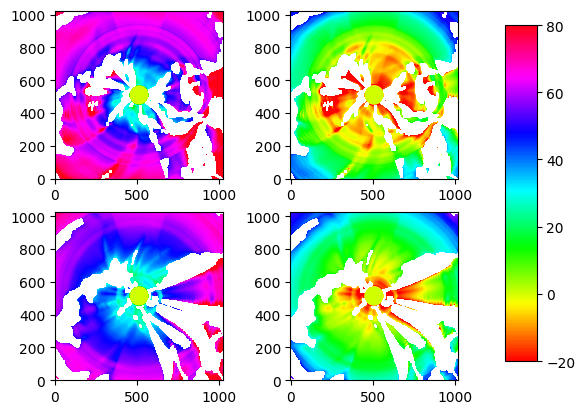

In [55]:
vmin = -20
vmax = 80
# plt.figure()
# plt.imshow(image_data_pB, origin = 'lower', norm = LogNorm())
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.imshow(image_data_tB, origin = 'lower', norm = LogNorm())
# plt.colorbar()
# plt.show()


fig, axs = plt.subplots(2,2)

axs[0,0].imshow(posMat[yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
axs[0,1].imshow(negMat[yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
axs[1,0].imshow(posMat2[yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
im = axs[1,1].imshow(negMat2[yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)


plt.show()